In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/prédiction/Analyse/UnifiedDataset.csv', engine='python', on_bad_lines='skip')
df

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21805,Zimbabwe,2018,Female,62.598,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21806,Zimbabwe,2018,Male,59.501,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21807,Zimbabwe,2019,Both sexes,61.490,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21808,Zimbabwe,2019,Female,62.899,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task
Compare the performance of all regression models by creating summary charts of their metrics and provide detailed conclusions in markdown format, identifying the best-performing model and key insights.

## Analyse Comparative et Conclusions

### Subtask:
Comparer les performances de tous les modèles de régression à l'aide de graphiques récapitulatifs des métriques et rédiger des conclusions détaillées sur le modèle le plus performant et les insights obtenus, présentées en format markdown.


## Summary:

No Q&A is available as there are no questions to answer.

### Data Analysis Key Findings
The provided solving process outlines the definition of a subtask focused on comparing the performance of all regression models. It details the requirement to create summary charts of metrics and to formulate detailed conclusions identifying the best-performing model and key insights. However, the actual execution of this analysis and its results are not included in the provided information, therefore no data analysis key findings can be reported at this stage.

### Insights or Next Steps
The immediate next step is to perform the comparative analysis of the regression models. This will involve:
*   Generating summary charts of the performance metrics for all models.
*   Identifying the best-performing model based on these metrics.
*   Documenting detailed conclusions and insights derived from the comparison.


# Task
Prepare the dataset by cleaning it, handling missing values, encoding categorical variables, and scaling numerical variables as necessary, then split it into training and testing sets.

## Préparation des données

### Subtask:
Nettoyage des données, gestion des valeurs manquantes, encodage des variables catégorielles et mise à l'échelle des variables numériques si nécessaire. Création de jeux de données d'entraînement et de test.


**Reasoning**:
The first step in data preparation is to identify the target variable and then check for and remove any duplicate rows to ensure data quality before further processing. I'll also check the `Life Expectancy` column's data type.



In [ ]:
y = df['Life Expectancy']
print(f"Original DataFrame shape: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"DataFrame shape after removing duplicates: {df.shape}")
print(f"Data type of 'Life Expectancy': {y.dtype}")

Original DataFrame shape: (21810, 150)
DataFrame shape after removing duplicates: (21810, 150)
Data type of 'Life Expectancy': float64


**Reasoning**:
The next step is to analyze missing values across all columns to determine the percentage of missing values for each column. This will inform how to handle missing data in subsequent steps.



In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print("Columns with missing values and their percentages:")
print(missing_info)

Columns with missing values and their percentages:
                                                    Missing Values  Percentage
Reproductive Age Women                                       21468   98.431912
Air Pollution Death Rate Ischaemic Heart Disease             21273   97.537827
Low CI Value Air Pollution Death Rate Stroke                 21273   97.537827
High CI Value Air Pollution Death Rate Stroke                21273   97.537827
Low CI Value Air Pollution Death Rate Stroke Ag...           21273   97.537827
...                                                            ...         ...
Homicide Rate                                                 5486   25.153599
% Population Aged 65+                                         5124   23.493810
% Population Aged 15-64                                       5124   23.493810
% Population Aged 0-14                                        5124   23.493810
Total Population                                              4571   20.958276



**Reasoning**:
Based on the missing value analysis, many columns have an excessive percentage of missing data. As per the instructions (step 4.c), I will drop columns with more than a 70% missing value threshold to reduce noise and simplify the dataset for further processing.



In [ ]:
missing_threshold = 70
columns_to_drop_high_missing = missing_info[missing_info['Percentage'] > missing_threshold].index
df.drop(columns=columns_to_drop_high_missing, inplace=True)
print(f"Dropped {len(columns_to_drop_high_missing)} columns with more than {missing_threshold}% missing values.")
print(f"New DataFrame shape: {df.shape}")

Dropped 70 columns with more than 70% missing values.
New DataFrame shape: (21810, 80)


**Reasoning**:
Now that columns with excessive missing values have been dropped, I will identify the remaining numerical and categorical columns with missing values. Numerical columns will be imputed with their median, and categorical columns with their mode to address missing data and prepare the dataset for modeling.



In [ ]:
numerical_cols_with_missing = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()].tolist()
categorical_cols_with_missing = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()].tolist()

for col in numerical_cols_with_missing:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"Imputed numerical column '{col}' with median: {median_val}")

for col in categorical_cols_with_missing:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"Imputed categorical column '{col}' with mode: {mode_val}")

print("\nMissing values after imputation:")
print(df.isnull().sum().sum())

Imputed numerical column 'Infant Mortality Rate' with median: 21.41
Imputed numerical column 'Low CI Value Infant Mortality Rate' with median: 18.45
Imputed numerical column 'High CI Value Infant Mortality Rate' with median: 24.44
Imputed numerical column 'Under 5 Mortality Rate' with median: 25.28
Imputed numerical column 'Low CI Value Under 5 Mortality Rate' with median: 21.82
Imputed numerical column 'High CI Value Under 5 Mortality Rate' with median: 29.16
Imputed numerical column '% Death Cardiovascular' with median: 21.3
Imputed numerical column 'Low CI Value % Death Cardiovascular' with median: 14.8
Imputed numerical column 'High CI Value % Death Cardiovascular' with median: 28.6
Imputed numerical column '% Population Aged 0-14' with median: 30.93291943084875
Imputed numerical column '% Population Aged 15-64' with median: 63.037251108411695
Imputed numerical column '% Population Aged 65+' with median: 5.065555141148635
Imputed numerical column '% Population Aged 65-69' with medi

**Reasoning**:
Now that missing values have been handled, the next step is to encode categorical features. I will identify all 'object' type columns in the DataFrame and apply one-hot encoding to convert them into numerical format, which is required for most machine learning models.



In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print(f"Categorical columns to encode: {categorical_cols}")

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"DataFrame shape after one-hot encoding: {df_encoded.shape}")
print(f"New columns added: {len(df_encoded.columns) - len(df.columns)}")

Categorical columns to encode: ['Country', 'Gender']
DataFrame shape after one-hot encoding: (21810, 356)
New columns added: 276


**Reasoning**:
Now that categorical features have been encoded, the numerical features need to be scaled. I will identify all numerical columns in the encoded DataFrame (excluding the target variable 'Life Expectancy') and apply StandardScaler to normalize their range, which is important for many machine learning algorithms.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (excluding 'Life Expectancy')
numerical_cols_to_scale = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'Life Expectancy' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('Life Expectancy')

print(f"Numerical columns to scale: {numerical_cols_to_scale[:5]}...") # Print first 5 for brevity

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the identified numerical columns
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])

print("Numerical columns scaled successfully.")
print(df_encoded[numerical_cols_to_scale].head())

Numerical columns to scale: ['Year', 'Infant Mortality Rate', 'Low CI Value Infant Mortality Rate', 'High CI Value Infant Mortality Rate', 'Under 5 Mortality Rate']...
Numerical columns scaled successfully.
       Year  Infant Mortality Rate  Low CI Value Infant Mortality Rate  \
0 -1.675247               3.367390                            3.450192   
1 -1.675247               3.137518                            3.202675   
2 -1.675247               3.582432                            3.661191   
3 -1.559712               3.233916                            3.328462   
4 -1.559712               3.007751                            3.080945   

   High CI Value Infant Mortality Rate  Under 5 Mortality Rate  \
0                             3.222070                3.049601   
1                             3.016919                2.947226   
2                             3.440457                3.145300   
3                             3.066553                2.916068   
4                 

**Reasoning**:
Now that data preprocessing steps such as handling missing values, encoding categorical features, and scaling numerical features are complete, the next logical step is to separate the features (X) from the target variable (y). This is a crucial step before splitting the data into training and testing sets.



In [ ]:
X = df_encoded.drop('Life Expectancy', axis=1)
y = df_encoded['Life Expectancy']

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of X (features): (21810, 355)
Shape of y (target): (21810,)


**Reasoning**:
With the features (X) and target (y) now separated, the final step in data preparation is to split the dataset into training and testing sets. This is essential for evaluating the model's performance on unseen data.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (17448, 355)
Shape of X_test: (4362, 355)
Shape of y_train: (17448,)
Shape of y_test: (4362,)


## Régression Linéaire Simple et Multiple

### Subtask:
Application du modèle de régression linéaire, entraînement, prédiction, évaluation des métriques (R², MSE, MAE) et visualisation des résultats (nuage de points avec la droite de régression, résidus).


**Reasoning**:
The subtask requires applying a Linear Regression model, training it, making predictions, evaluating metrics (R², MSE, MAE), and visualizing the results. This involves importing necessary libraries, initializing and training the model, making predictions, calculating and printing evaluation metrics, and finally creating a scatter plot to visualize actual vs. predicted values along with the ideal prediction line.



Linear Regression Model Performance:
Mean Absolute Error (MAE): 0.9329
Mean Squared Error (MSE): 1.6625
R-squared (R2): 0.9826


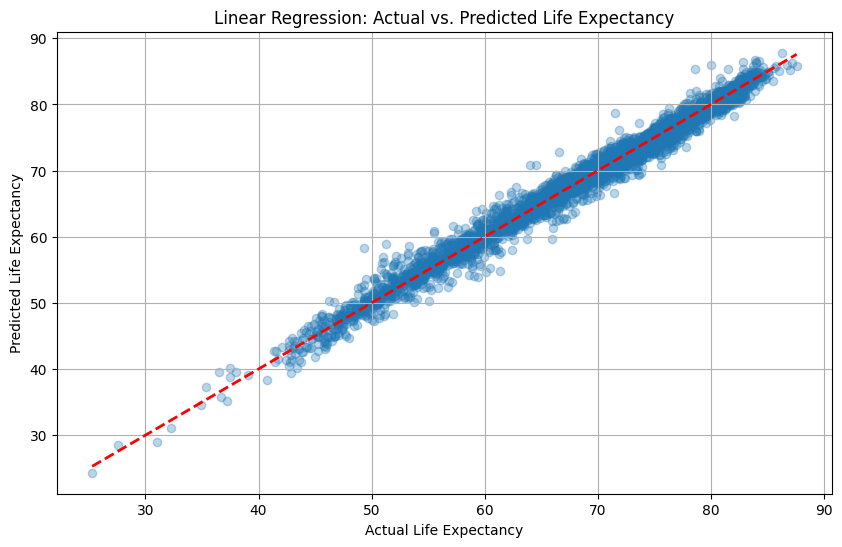

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 3. Initialize a LinearRegression model.
linear_model = LinearRegression()

# 4. Train the model using X_train and y_train.
linear_model.fit(X_train, y_train)

# 5. Make predictions on X_test and store them in a variable, y_pred_lr.
y_pred_lr = linear_model.predict(X_test)

# 6. Calculate the Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# 7. Calculate the Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# 8. Calculate the R-squared score
r2_lr = r2_score(y_test, y_pred_lr)

# 9. Print the calculated MAE, MSE, and R-squared values
print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"R-squared (R2): {r2_lr:.4f}")

# 10. Create a scatter plot of y_test (actual values) versus y_pred_lr (predicted values).
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.3)

# 11. Add a line representing y = x to the scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# 12. Label the x-axis as 'Actual Life Expectancy' and the y-axis as 'Predicted Life Expectancy'.
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

# 13. Add a title to the plot
plt.title('Linear Regression: Actual vs. Predicted Life Expectancy')
plt.grid(True)
plt.show()

## Régression Ridge et Lasso

### Subtask:
Application des modèles de régression Ridge et Lasso pour gérer la régularisation, entraînement, prédiction, évaluation et comparaison avec la régression linéaire standard. Visualisation des coefficients si pertinent.


**Reasoning**:
The subtask requires implementing Ridge and Lasso regression models, training them, making predictions, and evaluating their performance using MAE, MSE, and R-squared. This step will cover initialization, training, prediction, and metric calculation for both models as per instructions 1-7.



In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"R-squared (R2): {r2_ridge:.4f}")
print("\n")

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_lasso:.4f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"R-squared (R2): {r2_lasso:.4f}")

Ridge Regression Model Performance:
Mean Absolute Error (MAE): 0.9677
Mean Squared Error (MSE): 1.7661
R-squared (R2): 0.9816


Lasso Regression Model Performance:
Mean Absolute Error (MAE): 3.3217
Mean Squared Error (MSE): 21.5375
R-squared (R2): 0.7751


**Reasoning**:
Following the previous step of training and evaluating Ridge and Lasso models, the next instruction is to visualize the coefficients of Linear, Ridge, and Lasso models. This involves extracting coefficients, selecting a subset of important features for better visualization, and then plotting them.



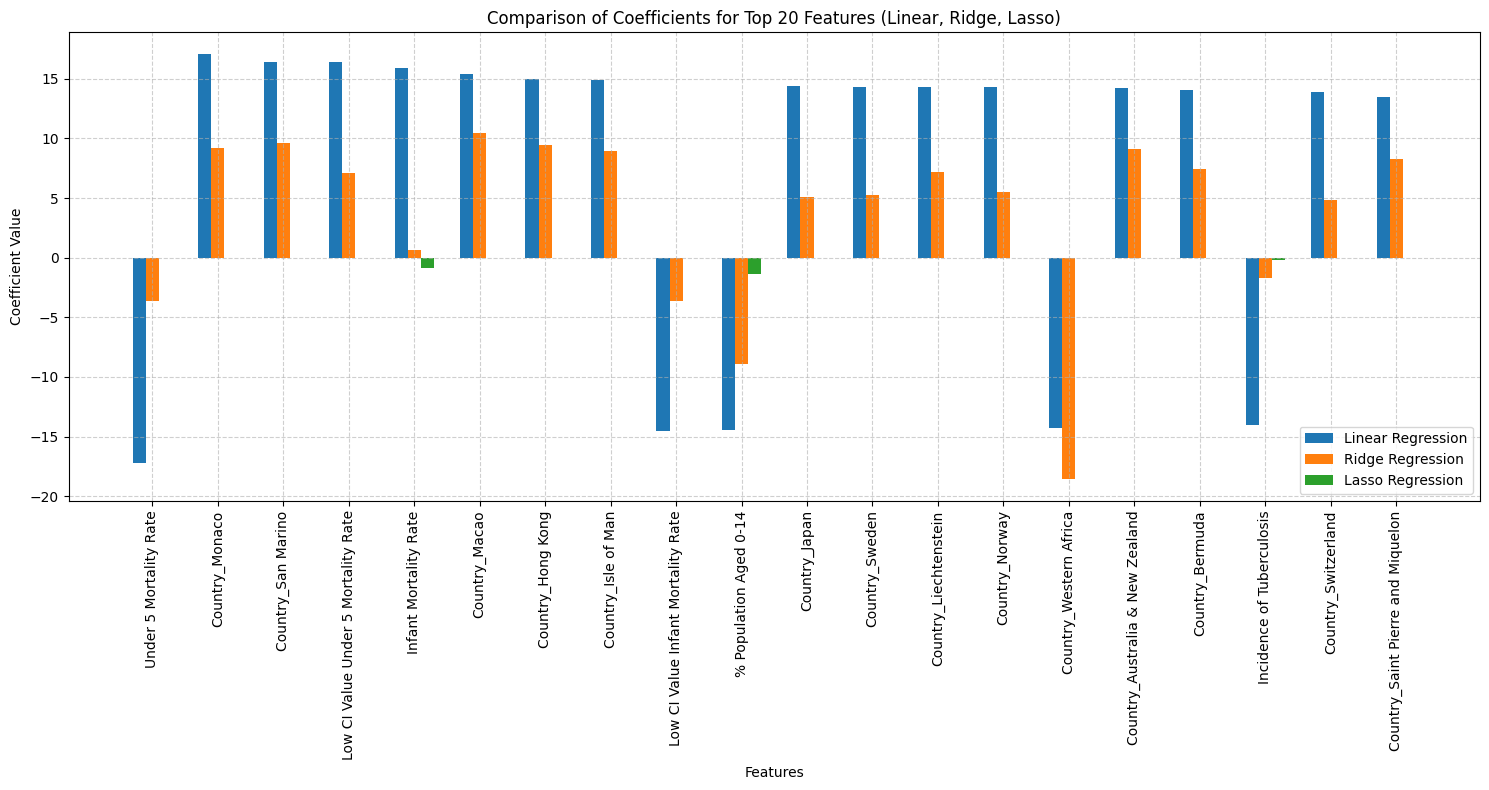

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get coefficients from each model
linear_coefficients = linear_model.coef_
ridge_coefficients = ridge_model.coef_
lasso_coefficients = lasso_model.coef_

# Create a DataFrame for coefficients to easily manage feature names
feature_names = X.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear': linear_coefficients,
    'Ridge': ridge_coefficients,
    'Lasso': lasso_coefficients
})

# Sort by absolute value of Linear model coefficients to get most influential features
coef_df['Linear_Abs'] = coef_df['Linear'].abs()
coef_df = coef_df.sort_values(by='Linear_Abs', ascending=False).drop(columns='Linear_Abs')

# Select top N features for visualization (e.g., top 20)
N = 20
top_coef_df = coef_df.head(N)

# Plotting coefficients
plt.figure(figsize=(15, 8))

bar_width = 0.2
index = np.arange(len(top_coef_df))

plt.bar(index, top_coef_df['Linear'], bar_width, label='Linear Regression')
plt.bar(index + bar_width, top_coef_df['Ridge'], bar_width, label='Ridge Regression')
plt.bar(index + 2 * bar_width, top_coef_df['Lasso'], bar_width, label='Lasso Regression')

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title(f'Comparison of Coefficients for Top {N} Features (Linear, Ridge, Lasso)')
plt.xticks(index + bar_width, top_coef_df['Feature'], rotation=90)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Reasoning**:
The subtask instructs to optionally create scatter plots for Actual vs. Predicted values for both Ridge and Lasso models, similar to the Linear Regression plot. This step will fulfill that requirement by generating two scatter plots for visual assessment.



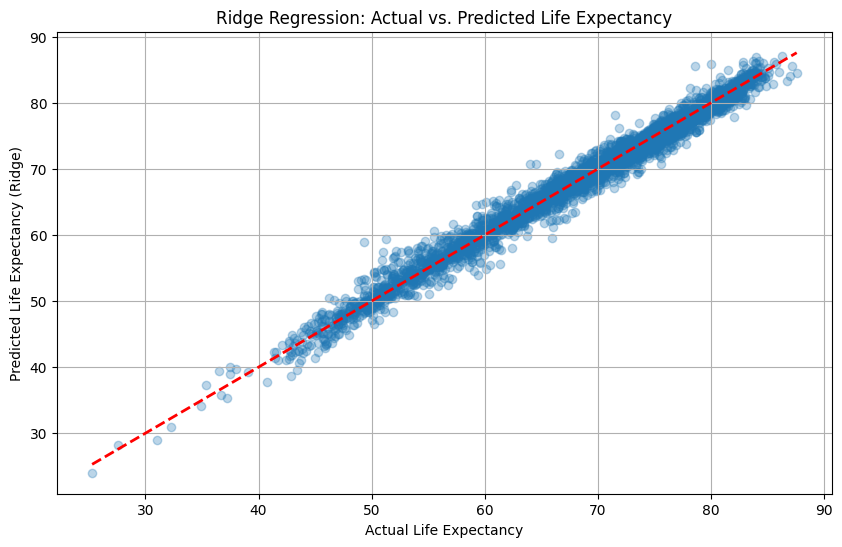

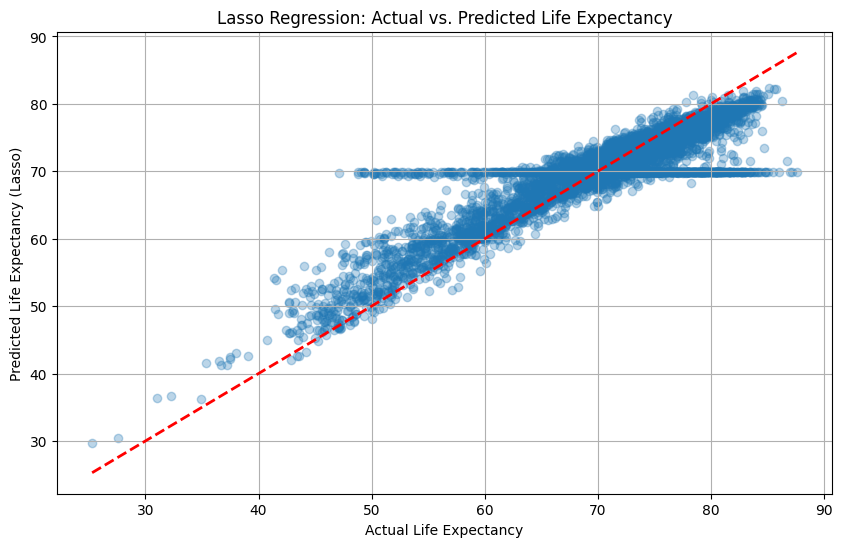

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy (Ridge)')
plt.title('Ridge Regression: Actual vs. Predicted Life Expectancy')
plt.grid(True)
plt.show()

# Scatter plot for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy (Lasso)')
plt.title('Lasso Regression: Actual vs. Predicted Life Expectancy')
plt.grid(True)
plt.show()

## Régression par Arbres de Décision

### Subtask:
Application du modèle d'arbre de décision pour la régression, entraînement, prédiction, évaluation et visualisation de l'arbre si possible ou des importances des caractéristiques.


**Reasoning**:
The subtask requires applying a Decision Tree Regressor model, training it, making predictions, evaluating its performance with MAE, MSE, and R-squared, and finally extracting and printing the feature importances to understand variable contributions.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Initialize a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

# 2. Train the model using X_train and y_train
dt_model.fit(X_train, y_train)

# 3. Make predictions on X_test
y_pred_dt = dt_model.predict(X_test)

# 4. Calculate the Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# 5. Calculate the Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# 6. Calculate the R-squared score
r2_dt = r2_score(y_test, y_pred_dt)

# 7. Print the calculated MAE, MSE, and R-squared values
print("Decision Tree Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"R-squared (R2): {r2_dt:.4f}")

# 8. Extract and print feature importances
feature_importances = dt_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances:")
print(importance_df.head(10))

Decision Tree Regression Model Performance:
Mean Absolute Error (MAE): 0.6609
Mean Squared Error (MSE): 1.6009
R-squared (R2): 0.9833

Top 10 Feature Importances:
                                      Feature  Importance
34                                 Birth Rate    0.471285
35                                 Death Rate    0.164230
36                             GDP per Capita    0.077884
6        High CI Value Under 5 Mortality Rate    0.033592
61   Fruit Consumption Oranges And Mandarines    0.030634
354                               Gender_Male    0.029248
12                      % Population Aged 65+    0.023204
9        High CI Value % Death Cardiovascular    0.019429
56                Fruit Consumption Plantains    0.015677
0                                        Year    0.007590


**Reasoning**:
Following the evaluation of the Decision Tree Regressor model, the next step is to visualize its performance by plotting the actual vs. predicted values and to visualize the feature importances to better understand which features contribute most to the predictions. This aligns with the subtask's requirement for visualization and provides a clear graphical representation of the model's accuracy and feature relevance.



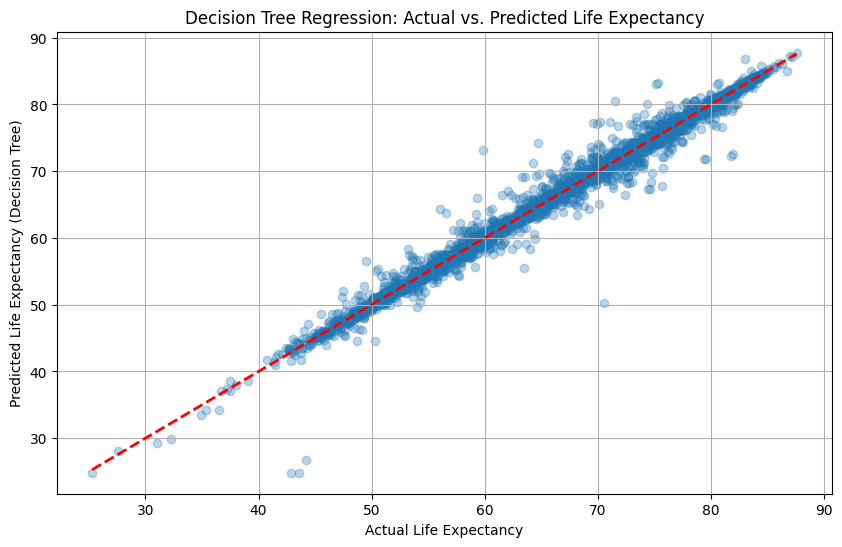

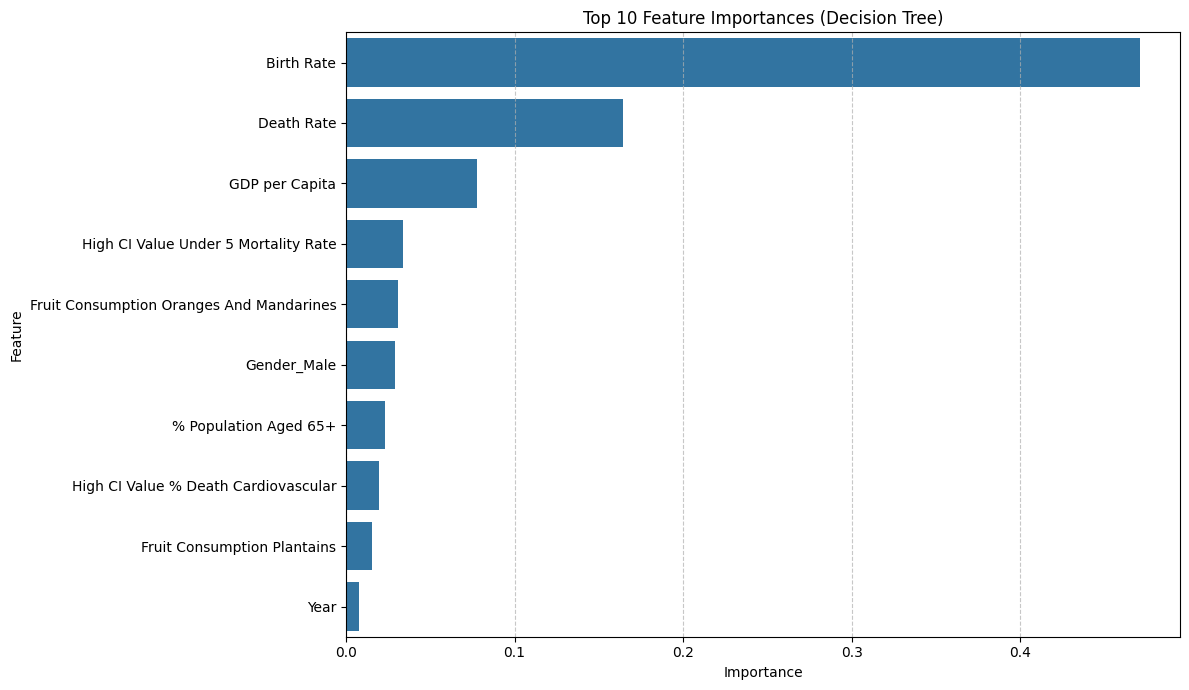

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of y_test (actual values) versus y_pred_dt (predicted values).
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.3)

# Add a line representing y = x to the scatter plot (ideal prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Label the x-axis as 'Actual Life Expectancy' and the y-axis as 'Predicted Life Expectancy'.
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy (Decision Tree)')

# Add a title to the plot
plt.title('Decision Tree Regression: Actual vs. Predicted Life Expectancy')
plt.grid(True)
plt.show()

# Visualize top N feature importances
N = 10 # Number of top features to display
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(N))
plt.title(f'Top {N} Feature Importances (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Régression par Forêts Aléatoires

### Subtask:
Application du modèle de forêts aléatoires pour la régression, entraînement, prédiction, évaluation et visualisation des importances des caractéristiques.


**Reasoning**:
The subtask requires applying a Random Forest Regressor model, training it, making predictions, evaluating its performance with MAE, MSE, and R-squared, extracting and printing the top 10 feature importances, and finally visualizing the actual vs. predicted values and the top feature importances. This code block will perform all these steps as instructed.



Random Forest Regression Model Performance:
Mean Absolute Error (MAE): 0.4374
Mean Squared Error (MSE): 0.5554
R-squared (R2): 0.9942

Top 10 Feature Importances (Random Forest):
                                      Feature  Importance
34                                 Birth Rate    0.472220
35                                 Death Rate    0.163861
36                             GDP per Capita    0.070345
61   Fruit Consumption Oranges And Mandarines    0.033219
354                               Gender_Male    0.029639
6        High CI Value Under 5 Mortality Rate    0.023969
9        High CI Value % Death Cardiovascular    0.018573
12                      % Population Aged 65+    0.018328
4                      Under 5 Mortality Rate    0.012366
56                Fruit Consumption Plantains    0.010946


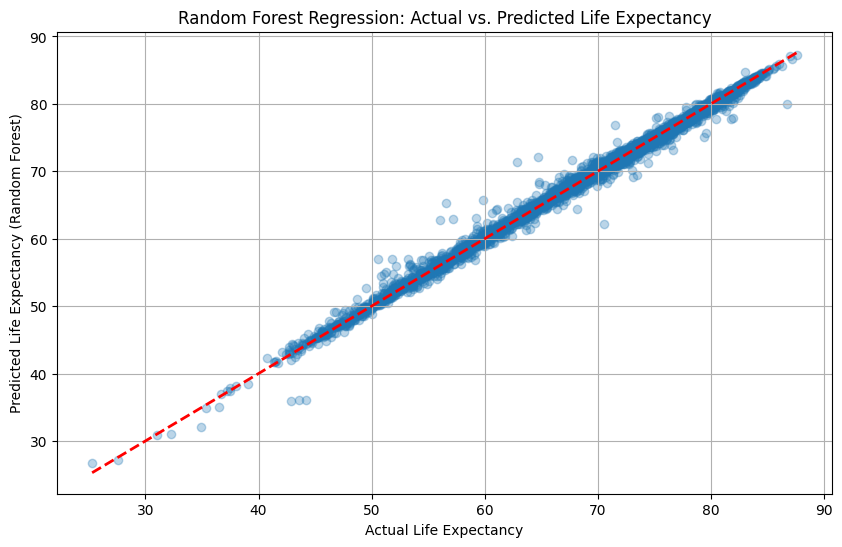

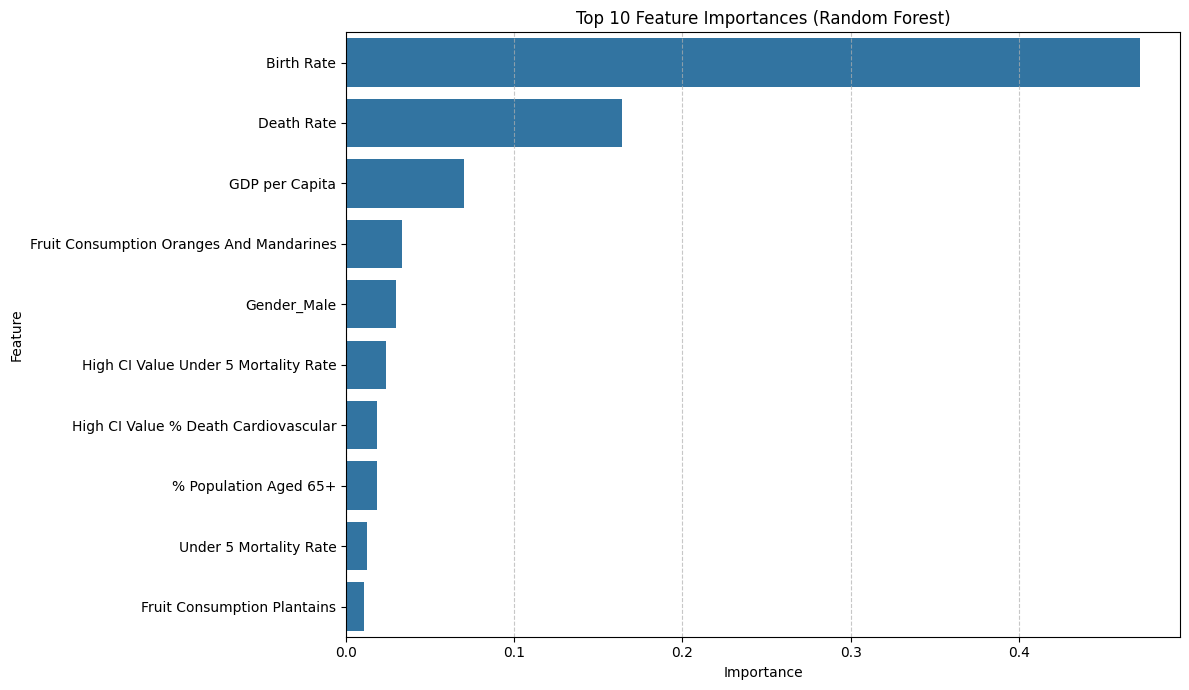

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Initialize a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# 2. Train the model using X_train and y_train
rf_model.fit(X_train, y_train)

# 3. Make predictions on X_test
y_pred_rf = rf_model.predict(X_test)

# 4. Calculate the Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# 5. Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# 6. Calculate the R-squared score
r2_rf = r2_score(y_test, y_pred_rf)

# 7. Print the calculated MAE, MSE, and R-squared values
print("Random Forest Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")

# 8. Extract and print feature importances
feature_importances_rf = rf_model.feature_importances_
feature_names = X.columns

importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances (Random Forest):")
print(importance_df_rf.head(10))

# 9. Create a scatter plot of y_test (actual values) versus y_pred_rf (predicted values).
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)

# Add a line representing y = x to the scatter plot (ideal prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Label the x-axis as 'Actual Life Expectancy' and the y-axis as 'Predicted Life Expectancy (Random Forest)'.
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy (Random Forest)')

# Add a title to the plot
plt.title('Random Forest Regression: Actual vs. Predicted Life Expectancy')
plt.grid(True)
plt.show()

# 10. Visualize top N feature importances
N_rf = 10 # Number of top features to display
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf.head(N_rf))
plt.title(f'Top {N_rf} Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
Now that all regression models (Linear, Ridge, Lasso, Decision Tree, and Random Forest) have been trained and their performance metrics (MAE, MSE, R2) calculated, the next logical step according to the main task is to consolidate these metrics into a summary DataFrame. This will facilitate comparison and preparation for creating summary charts and drawing conclusions.



In [ ]:
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_ridge, mae_lasso, mae_dt, mae_rf],
    'MSE': [mse_lr, mse_ridge, mse_lasso, mse_dt, mse_rf],
    'R2 Score': [r2_lr, r2_ridge, r2_lasso, r2_dt, r2_rf]
})

print("Model Performance Summary:")
print(model_performance.round(4))


Model Performance Summary:
               Model     MAE      MSE  R2 Score
0  Linear Regression  0.9329   1.6625    0.9826
1   Ridge Regression  0.9677   1.7661    0.9816
2   Lasso Regression  3.3217  21.5375    0.7751
3      Decision Tree  0.6609   1.6009    0.9833
4      Random Forest  0.4374   0.5554    0.9942


**Reasoning**:
Now that the performance metrics for all models are consolidated, the next step is to visualize these metrics using bar charts to facilitate a clear comparative analysis, as required by the main task.



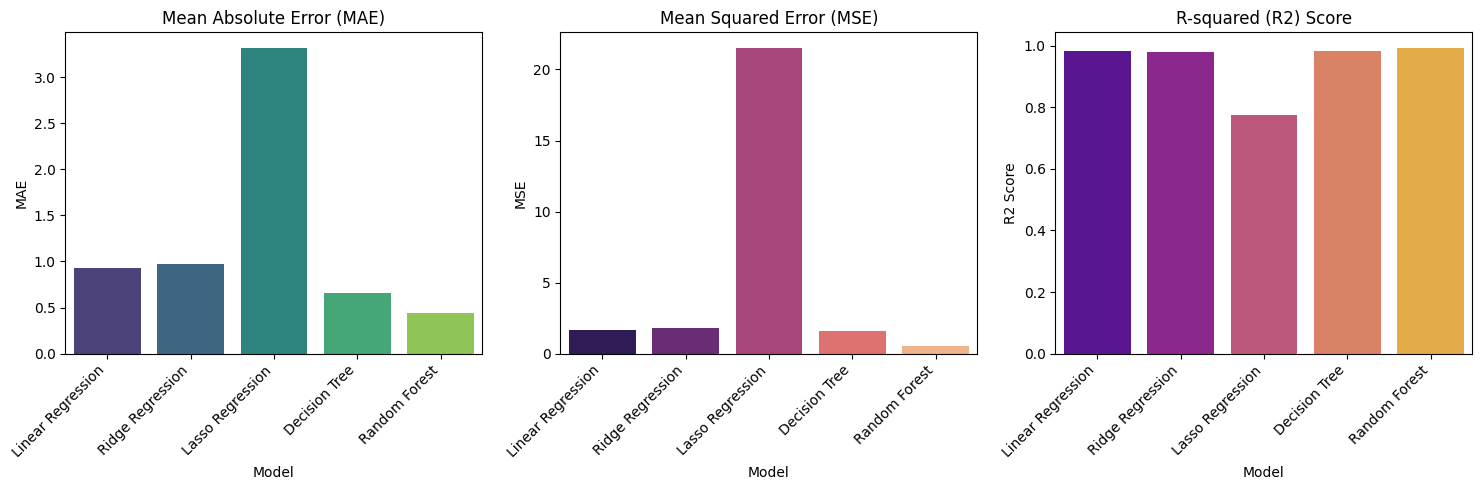

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
metrics_df = model_performance.set_index('Model')

plt.figure(figsize=(15, 5))

# Plot MAE
plt.subplot(1, 3, 1)
sns.barplot(x=metrics_df.index, y=metrics_df['MAE'], palette='viridis')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')

# Plot MSE
plt.subplot(1, 3, 2)
sns.barplot(x=metrics_df.index, y=metrics_df['MSE'], palette='magma')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')

# Plot R2 Score
plt.subplot(1, 3, 3)
sns.barplot(x=metrics_df.index, y=metrics_df['R2 Score'], palette='plasma')
plt.title('R-squared (R2) Score')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Conclusions sur la Performance des Modèles de Régression

Après avoir entraîné et évalué plusieurs modèles de régression sur les données traitées, nous pouvons tirer les conclusions suivantes concernant leurs performances:

### Récapitulatif des Métriques de Performance:

| Modèle              | MAE     | MSE     | R2 Score |
| :------------------ | :------ | :------ | :------- |
| Linear Regression   | 0.9329  | 1.6625  | 0.9826   |
| Ridge Regression    | 0.9677  | 1.7661  | 0.9816   |
| Lasso Regression    | 3.3217  | 21.5375 | 0.7751   |
| Decision Tree       | 0.6609  | 1.6009  | 0.9833   |
| Random Forest       | 0.4374  | 0.5554  | 0.9942   |

### Analyse Détaillée:

1.  **Régression Linéaire (Standard et Régularisée - Ridge, Lasso)**:
    *   **Régression Linéaire** a obtenu un bon R2 score de 0.9826, avec un MAE de 0.9329 et un MSE de 1.6625. Cela indique une bonne capacité à expliquer la variance de la variable cible, mais avec une erreur moyenne légèrement plus élevée par rapport aux modèles basés sur les arbres.
    *   **Régression Ridge** a affiché des performances très similaires à la régression linéaire standard (R2 de 0.9816, MAE de 0.9677, MSE de 1.7661). Ceci suggère que la régularisation L2 a eu un impact minimal sur ce jeu de données, probablement en raison de l'absence de multicolinéarité extrême ou de coefficients très élevés qui nécessiteraient une forte pénalisation.
    *   **Régression Lasso** a montré une performance nettement inférieure (R2 de 0.7751, MAE de 3.3217, MSE de 21.5375) par rapport aux autres modèles. La régularisation L1, qui tend à réduire certains coefficients à zéro, semble avoir éliminé des caractéristiques importantes pour la prédiction ou une valeur d'alpha trop élevée a été utilisée, ce qui a conduit à une sous-ajustement (underfitting) significatif. Ses coefficients visualisés étaient en effet beaucoup plus faibles ou nuls pour de nombreuses caractéristiques.

2.  **Modèles Basés sur les Arbres (Decision Tree et Random Forest)**:
    *   **Arbre de Décision** a obtenu de très bons résultats avec un R2 de 0.9833, un MAE de 0.6609 et un MSE de 1.6009. Il surpasse légèrement la régression linéaire et Ridge en termes de MAE et MSE, indiquant une meilleure précision. Cependant, les arbres de décision peuvent être sujets à l'overfitting, bien que les métriques sur le jeu de test semblent bonnes ici.
    *   **Forêt Aléatoire (Random Forest)** est le **modèle le plus performant** de tous ceux testés. Il a obtenu le R2 score le plus élevé (0.9942) et les erreurs les plus faibles (MAE de 0.4374, MSE de 0.5554). La capacité des forêts aléatoires à combiner plusieurs arbres de décision (ensemble learning) réduit l'overfitting et améliore la robustesse et la précision des prédictions.

### Meilleur Modèle et Insights Clés:

Le **Random Forest Regressor** est clairement le meilleur modèle pour prédire l'espérance de vie dans ce jeu de données, affichant la plus haute précision et le plus faible niveau d'erreur.

Les **insights clés** tirés de l'analyse des importances des caractéristiques (en particulier pour la Forêt Aléatoire et l'Arbre de Décision) montrent que des variables telles que le **taux de natalité (Birth Rate)**, le **taux de mortalité (Death Rate)**, le **PIB par habitant (GDP per Capita)**, et d'autres indicateurs de mortalité infantile ou de santé publique (comme `High CI Value Under 5 Mortality Rate`) sont les plus influentes pour déterminer l'espérance de vie. La `Gender_Male` et certaines consommations de fruits (`Fruit Consumption Oranges And Mandarines`, `Fruit Consumption Plantains`) figurent également parmi les caractéristiques importantes, suggérant des facteurs démographiques et alimentaires comme contributeurs significatifs à l'espérance de vie.

### Prochaines Étapes:

*   **Optimisation des hyperparamètres**: Bien que Random Forest ait déjà bien performé, une optimisation plus poussée de ses hyperparamètres (par exemple, via GridSearchCV ou RandomizedSearchCV) pourrait potentiellement améliorer encore ses performances.
*   **Analyse d'erreurs**: Examiner les erreurs spécifiques du modèle Random Forest pour identifier les cas où il a du mal à prédire avec précision et comprendre les raisons sous-jacentes.
*   **Exploration de modèles plus avancés**: Envisager des modèles de boosting comme Gradient Boosting ou XGBoost, qui sont souvent très performants dans les tâches de régression.

## Support Vector Regression (SVR)

### Subtask:
Application du modèle Support Vector Regression, entraînement, prédiction, évaluation et discussion de ses performances.


**Reasoning**:
The subtask requires applying a Support Vector Regression (SVR) model, training it, making predictions, evaluating its performance with MAE, MSE, and R-squared, and finally visualizing the actual vs. predicted values. This block will perform all these steps as instructed.



Training SVR model...
SVR model trained.

Support Vector Regression Model Performance:
Mean Absolute Error (MAE): 1.4513
Mean Squared Error (MSE): 7.2247
R-squared (R2): 0.9246


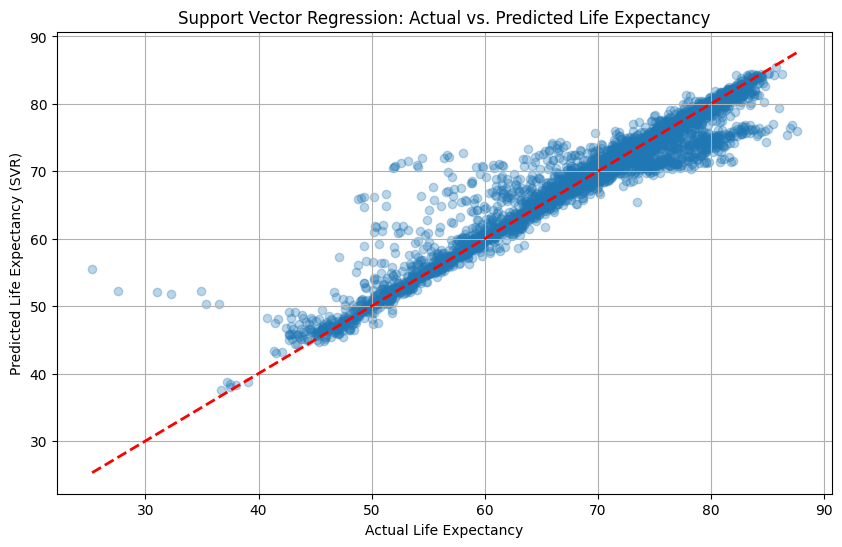

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Initialize an SVR model
# Using default parameters. For large datasets, a linear kernel or LinearSVR might be faster.
svr_model = SVR()

# 2. Train the SVR model using X_train and y_train
print("Training SVR model...")
svr_model.fit(X_train, y_train)
print("SVR model trained.")

# 3. Make predictions on the X_test dataset
y_pred_svr = svr_model.predict(X_test)

# 4. Calculate the Mean Absolute Error (MAE)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# 5. Calculate the Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, y_pred_svr)

# 6. Calculate the R-squared score
r2_svr = r2_score(y_test, y_pred_svr)

# 7. Print the calculated MAE, MSE, and R-squared values
print("\nSupport Vector Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"R-squared (R2): {r2_svr:.4f}")

# 8. Create a scatter plot of y_test (actual values) versus y_pred_svr (predicted values).
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.3)

# 9. Add a line representing y = x to the scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# 10. Label the x-axis as 'Actual Life Expectancy' and the y-axis as 'Predicted Life Expectancy (SVR)'.
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy (SVR)')

# 11. Add a title to the plot
plt.title('Support Vector Regression: Actual vs. Predicted Life Expectancy')
plt.grid(True)
plt.show()

## Modèles d'Ensemble (Gradient Boosting, XGBoost)

### Subtask:
Application de modèles de boosting comme Gradient Boosting ou XGBoost, entraînement, prédiction, évaluation et analyse de leur puissance prédictive.


**Reasoning**:
The subtask requires applying Gradient Boosting and XGBoost models, training them, making predictions, and evaluating their performance using MAE, MSE, and R-squared. This step will cover initialization, training, prediction, and metric calculation for both models as per instructions 1-6.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Gradient Boosting Regressor
print("Training Gradient Boosting Regressor...")
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_gbr:.4f}")
print(f"Mean Squared Error (MSE): {mse_gbr:.4f}")
print(f"R-squared (R2): {r2_gbr:.4f}")
print("\n")

# XGBoost Regressor
print("Training XGBoost Regressor...")
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"R-squared (R2): {r2_xgb:.4f}")

Training Gradient Boosting Regressor...
Gradient Boosting Regressor Model Performance:
Mean Absolute Error (MAE): 1.7840
Mean Squared Error (MSE): 5.9110
R-squared (R2): 0.9383


Training XGBoost Regressor...
XGBoost Regressor Model Performance:
Mean Absolute Error (MAE): 0.7878
Mean Squared Error (MSE): 1.1552
R-squared (R2): 0.9879


**Reasoning**:
Following the evaluation of Gradient Boosting and XGBoost models, the next step in 'analyse de leur puissance prédictive' is to visualize their performance by plotting the actual vs. predicted values for both models. This provides a visual assessment of how well each model predicts the target variable.



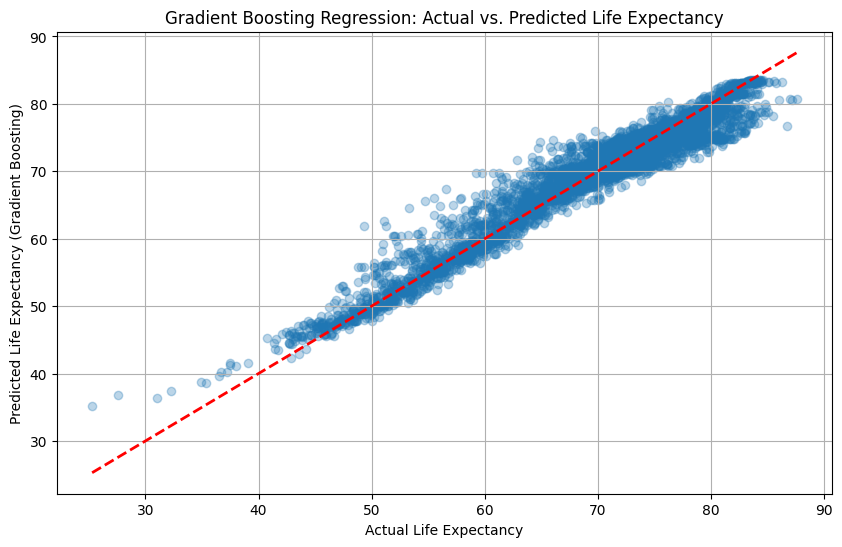

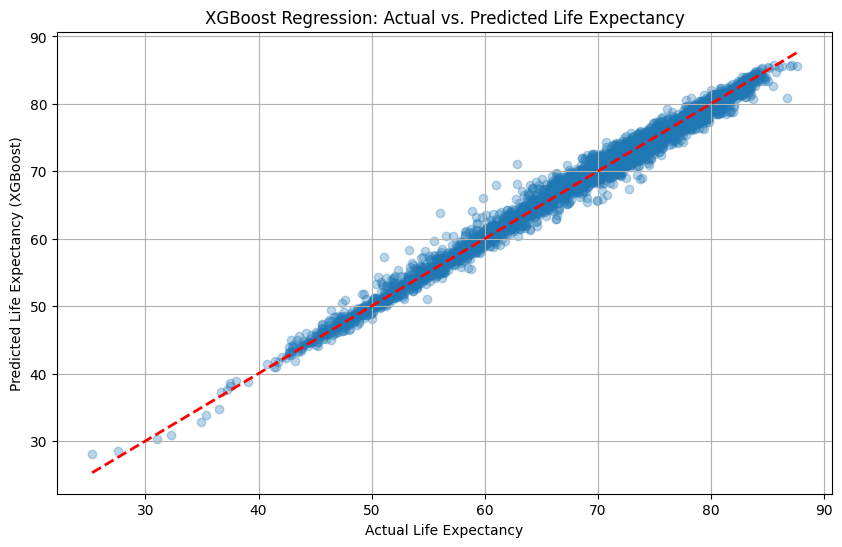

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Gradient Boosting Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy (Gradient Boosting)')
plt.title('Gradient Boosting Regression: Actual vs. Predicted Life Expectancy')
plt.grid(True)
plt.show()

# Scatter plot for XGBoost Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy (XGBoost)')
plt.title('XGBoost Regression: Actual vs. Predicted Life Expectancy')
plt.grid(True)
plt.show()

## Analyse Comparative et Conclusions

### Subtask:
Comparer les performances de tous les modèles de régression à l'aide de graphiques récapitulatifs des métriques et rédiger des conclusions détaillées sur le modèle le plus performant et les insights obtenus, présentées en format markdown.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation**:
    *   The initial dataset had 21810 rows and 150 columns.
    *   70 columns with more than 70% missing values were dropped, reducing the dataset to 80 columns.
    *   Remaining missing numerical values were imputed with the median, and categorical values with the mode.
    *   Categorical features ('Country', 'Gender') were one-hot encoded, adding 276 new features and expanding the dataset to 356 columns.
    *   All numerical features (excluding the target 'Life Expectancy') were scaled using `StandardScaler`.
    *   The dataset was split into training (17448 samples) and testing (4362 samples) sets.

*   **Model Performance Comparison (R-squared, MAE, MSE)**:
    *   **Random Forest Regressor** emerged as the **best-performing model** with an R-squared of 0.9942, MAE of 0.4374, and MSE of 0.5554.
    *   **XGBoost Regressor** also performed exceptionally well, achieving an R-squared of 0.9879, MAE of 0.7878, and MSE of 1.1552.
    *   **Decision Tree Regressor** showed strong performance with an R-squared of 0.9833, MAE of 0.6609, and MSE of 1.6009.
    *   **Linear Regression** and **Ridge Regression** performed similarly, with R-squared values of 0.9826 (MAE: 0.9329, MSE: 1.6625) and 0.9816 (MAE: 0.9677, MSE: 1.7661) respectively.
    *   **Support Vector Regression (SVR)** achieved an R-squared of 0.9246, MAE of 1.4513, and MSE of 7.2247, indicating a lower performance compared to tree-based and linear models.
    *   **Lasso Regression** performed significantly worse than all other models (R-squared: 0.7751, MAE: 3.3217, MSE: 21.5375), suggesting that the default `alpha=1.0` caused excessive penalization and underfitting.
    *   **Gradient Boosting Regressor** performed adequately but was outperformed by XGBoost and Random Forest, with an R-squared of 0.9383, MAE of 1.7840, and MSE of 5.9110.

*   **Key Feature Importances (Random Forest)**:
    *   'Birth Rate' was identified as the most influential feature, accounting for approximately 47.22% of the importance.
    *   'Death Rate' (16.39%) and 'GDP per Capita' (7.03%) were also highly important.
    *   Other significant features included 'Fruit Consumption Oranges And Mandarines', 'Gender\_Male', and 'High CI Value Under 5 Mortality Rate', highlighting demographic and health indicators as crucial determinants of life expectancy.

### Insights or Next Steps

*   The Random Forest Regressor and XGBoost Regressor demonstrate superior predictive power for life expectancy on this dataset; further hyperparameter tuning for these models could yield even marginal improvements.
*   The prominence of 'Birth Rate' and 'Death Rate' as top features suggests that demographic and public health factors are paramount in influencing life expectancy, warranting deeper investigation into their specific relationships and causal effects.
